## Price Predictor

In [1]:
import pandas as pd

In [2]:
housing=pd.read_csv("D:\\All project\\ml project\\data.csv")

In [3]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null int64
NOX        506 non-null float64
RM         502 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null int64
TAX        506 non-null int64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
MEDV       506 non-null float64
dtypes: float64(11), int64(3)
memory usage: 55.4 KB


In [5]:
housing['CHAS'].value_counts()

0    471
1     35
Name: CHAS, dtype: int64

In [6]:
housing['CHAS']

0      0
1      0
2      0
3      0
4      0
5      0
6      0
7      0
8      0
9      0
10     0
11     0
12     0
13     0
14     0
15     0
16     0
17     0
18     0
19     0
20     0
21     0
22     0
23     0
24     0
25     0
26     0
27     0
28     0
29     0
      ..
476    0
477    0
478    0
479    0
480    0
481    0
482    0
483    0
484    0
485    0
486    0
487    0
488    0
489    0
490    0
491    0
492    0
493    0
494    0
495    0
496    0
497    0
498    0
499    0
500    0
501    0
502    0
503    0
504    0
505    0
Name: CHAS, Length: 506, dtype: int64

In [7]:
housing.describe() #SD,25%:-25% of data is having the corresponding values

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,502.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.286131,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.705046,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.884250,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.209000,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.628000,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [8]:
%matplotlib inline

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001EC81BC0B70>,
      dtype=object)

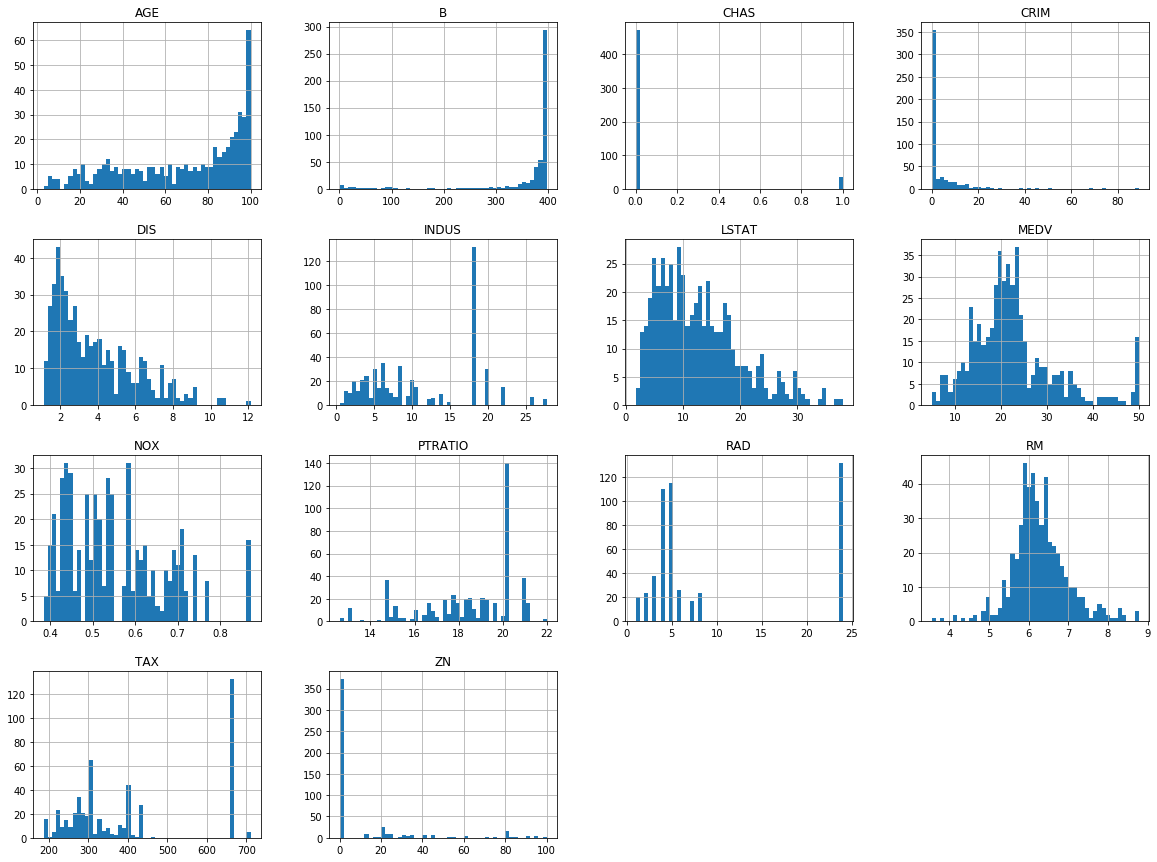

In [9]:
#For plotting histogram of each attribute 
import matplotlib.pyplot as plt
housing.hist(bins=50,figsize=(20,15))

## Train-Test Splitting

In [10]:
#For learning purpose
import numpy as np
def split_train_test(data,test_ratio):
    np.random.seed(42)  #for fixing the dataset constant,42 is just recoomended to use by professionals!!!
    shuffled=np.random.permutation(len(data))  #For shuffling dataset
    test_set_size=int(len(data)*test_ratio)  
    test_indices=shuffled[:test_set_size]
    train_indices=shuffled[test_set_size:]
    return data.iloc[train_indices],data.iloc[test_indices]
    

In [11]:
 train_set,test_set=split_train_test(housing,0.2)

In [12]:
print(f"Rows in train set:{len(train_set)}\nRows in test set:{len(test_set)}\n")

Rows in train set:405
Rows in test set:101



In [13]:
#Here we have divided our training set along with testing set.
#But in real analysis we do the same like following :-

from sklearn.model_selection import train_test_split
train_set,test_set=train_test_split(housing,test_size=0.2,random_state=42)
print(f"Rows in train set:{len(train_set)}\nRows in test set:{len(test_set)}\n")

In [15]:
#But in this type of splitting we can have problem like let's say a column is having only 0 & 1.When you split data,then what
#happen when all the 1's comes under the training data,then we can't predict our output properly.
#so to avoid this problem we have to split the data uniformly with the help of sklearn function.

In [16]:
from sklearn.model_selection import StratifiedShuffleSplit
split=StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42)
for train_index,test_index in split.split(housing,housing['CHAS']):
    strat_train_set=housing.loc[train_index]
    strat_test_set=housing.loc[test_index]

In [17]:
strat_test_set['CHAS'].value_counts()

0    95
1     7
Name: CHAS, dtype: int64

In [18]:
strat_train_set['CHAS'].value_counts()

0    376
1     28
Name: CHAS, dtype: int64

In [19]:
95/7

13.571428571428571

In [20]:
376/28     #Uniformly distributed

13.428571428571429

In [21]:
housing=strat_train_set.copy()  #Now we have to take the train set as a original dataset.
#If we further want to fill any missing value or something else then we have to do into the
#copy so that changes doesn't make any changes to the test set.

## Looking for Correlations

In [22]:
corr_matrix=housing.corr()

In [23]:
corr_matrix['MEDV'].sort_values(ascending=False)  #+1 means it has a strong positive relation and -1 means negative relation 

MEDV       1.000000
RM         0.680319
B          0.361761
ZN         0.339741
DIS        0.240451
CHAS       0.205066
AGE       -0.364596
RAD       -0.374693
CRIM      -0.393715
NOX       -0.422873
TAX       -0.456657
INDUS     -0.473516
PTRATIO   -0.493534
LSTAT     -0.740494
Name: MEDV, dtype: float64

In [24]:
#Plotting the graph among attributes for finding the patterns

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001EC811D5128>,
      dtype=object)

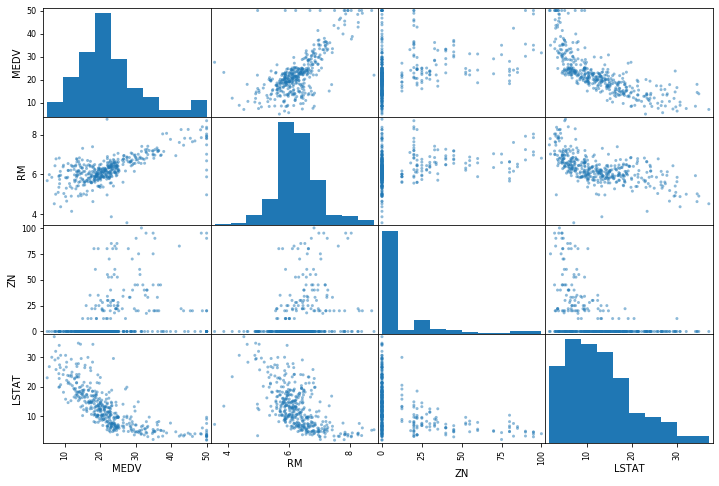

In [25]:
from pandas.plotting import scatter_matrix
a=["MEDV","RM","ZN","LSTAT"]
scatter_matrix(housing[a],figsize=(12,8))

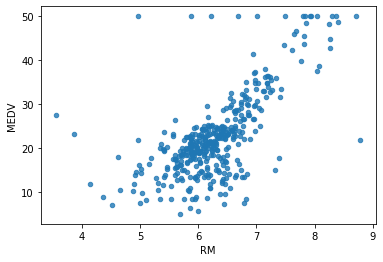

In [26]:
housing.plot(kind="scatter",x="RM",y="MEDV",alpha=0.8)  

## Trying out Attribute combinations

In [27]:
housing["TAXRM"]=housing["TAX"]/housing["RM"]
housing["TAXRM"]

254     51.571709
348     42.200452
476    102.714374
321     45.012547
326     45.468948
411    100.045065
250     50.870973
100     57.083395
429    104.388715
57      37.558685
413    129.194956
115     72.874494
490    139.603377
199     57.634409
494     65.980425
142     74.588192
113     70.912672
468    112.386095
400    111.241022
247     53.003534
151     74.574389
408    118.568631
68      61.673221
365    187.026116
81      42.453543
93      43.471261
456    111.445783
116     69.948187
27      50.768976
234     45.643770
          ...    
433    103.480423
430    104.914934
479    106.919249
438    112.215670
38      46.765002
18      56.268328
97      34.204982
266     37.639008
133     75.060117
449    103.786816
477    125.565611
171     68.537415
180     24.855119
158     66.435872
279     31.708749
109     61.647134
82      44.589019
386    143.164230
418    111.801242
126     33.493675
446    105.030752
101     56.628816
277     37.210665
405    117.191624
367    172

In [28]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,TAXRM
254,0.04819,80.0,3.64,0,0.392,6.108,32.0,9.2203,1,315,16.4,392.89,6.57,21.9,51.571709
348,0.01501,80.0,2.01,0,0.435,6.635,29.7,8.3440,4,280,17.0,390.94,5.99,24.5,42.200452
476,4.87141,0.0,18.10,0,0.614,6.484,93.6,2.3053,24,666,20.2,396.21,18.68,16.7,102.714374
321,0.18159,0.0,7.38,0,0.493,6.376,54.3,4.5404,5,287,19.6,396.90,6.87,23.1,45.012547
326,0.30347,0.0,7.38,0,0.493,6.312,28.9,5.4159,5,287,19.6,396.90,6.15,23.0,45.468948


In [29]:
corr_matrix=housing.corr()
corr_matrix['MEDV'].sort_values(ascending=False)  #+1 means it has a strong positive relation and -1 means negative relation 

MEDV       1.000000
RM         0.680319
B          0.361761
ZN         0.339741
DIS        0.240451
CHAS       0.205066
AGE       -0.364596
RAD       -0.374693
CRIM      -0.393715
NOX       -0.422873
TAX       -0.456657
INDUS     -0.473516
PTRATIO   -0.493534
TAXRM     -0.529500
LSTAT     -0.740494
Name: MEDV, dtype: float64

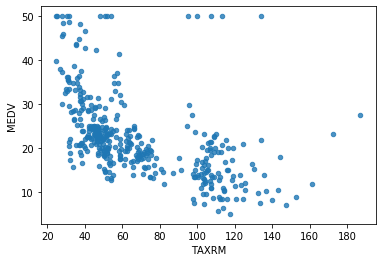

In [30]:
housing.plot(kind="scatter",x="TAXRM",y="MEDV",alpha=0.8)  

In [31]:
housing=strat_train_set.drop("MEDV",axis=1)
housing_labels=strat_train_set["MEDV"].copy()

## Missing Attributes 

In [32]:
#To take care of missing attributes you have three options
#1. Get rid of the missing data points.
#2. Get rid of the whole attributes
#3. Set the value to some value(0,mean,median)

In [33]:
a=housing.dropna(subset=["RM"]) #option 1 that is not changed in real housing
a.shape

(401, 13)

In [34]:
housing.drop("RM",axis=1) #Option 2
#Note that there is no RM column and also original dataframe will remain unchanged.
#Untill we set inplace true.

,CRIM,ZN,INDUS,CHAS,NOX,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
254,0.04819,80.0,3.64,0,0.3920,32.0,9.2203,1,315,16.4,392.89,6.57
348,0.01501,80.0,2.01,0,0.4350,29.7,8.3440,4,280,17.0,390.94,5.99
476,4.87141,0.0,18.10,0,0.6140,93.6,2.3053,24,666,20.2,396.21,18.68
321,0.18159,0.0,7.38,0,0.4930,54.3,4.5404,5,287,19.6,396.90,6.87
326,0.30347,0.0,7.38,0,0.4930,28.9,5.4159,5,287,19.6,396.90,6.15
411,14.05070,0.0,18.10,0,0.5970,100.0,1.5275,24,666,20.2,35.05,21.22
250,0.14030,22.0,5.86,0,0.4310,13.0,7.3967,7,330,19.1,396.28,5.90
100,0.14866,0.0,8.56,0,0.5200,79.9,2.7778,5,384,20.9,394.76,9.42
429,9.33889,0.0,18.10,0,0.6790,95.6,1.9682,24,666,20.2,60.72,24.08
57,0.01432,100.0,1.32,0,0.4110,40.5,8.3248,5,256,15.1,392.90,3.95


In [35]:
median=housing["RM"].median()
median

6.211

In [36]:
housing["RM"].fillna(median)
#Note that there is no RM column and also original dataframe will remain unchanged.
#Untill we set inplace true.

254    6.108
348    6.635
476    6.484
321    6.376
326    6.312
411    6.657
250    6.487
100    6.727
429    6.380
57     6.816
413    5.155
115    5.928
490    5.093
199    6.975
494    5.926
142    5.403
113    6.092
468    5.926
400    5.987
247    6.226
151    5.404
408    5.617
68     5.594
365    3.561
81     6.619
93     6.211
456    5.976
116    6.176
27     6.047
234    6.726
       ...  
433    6.436
430    6.348
479    6.229
438    5.935
38     5.966
18     5.456
97     8.069
266    7.014
133    5.822
449    6.417
477    5.304
171    5.880
180    7.765
158    6.066
279    6.812
109    6.229
82     6.302
386    4.652
418    5.957
126    5.613
446    6.341
101    6.781
277    6.826
405    5.683
367    3.863
155    6.152
423    6.103
98     7.820
455    6.525
216    5.888
Name: RM, Length: 404, dtype: float64

In [37]:
housing.shape

(404, 13)

In [38]:
housing.describe()  #before we started filling missing attributes

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,404.000000,404.000000,404.000000,404.000000,404.000000,401.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.602814,10.836634,11.344950,0.069307,0.558064,6.281277,69.039851,3.746210,9.735149,412.341584,18.473267,353.392822,12.791609
std,8.099383,22.150636,6.877817,0.254290,0.116875,0.715266,28.258248,2.099057,8.731259,168.672623,2.129243,96.069235,7.235740
min,0.006320,0.000000,0.740000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,13.000000,0.320000,1.730000
25%,0.086963,0.000000,5.190000,0.000000,0.453000,5.878000,44.850000,2.035975,4.000000,284.000000,17.400000,374.617500,6.847500
50%,0.286735,0.000000,9.900000,0.000000,0.538000,6.211000,78.200000,3.122200,5.000000,337.000000,19.000000,390.955000,11.570000
75%,3.731923,12.500000,18.100000,0.000000,0.631000,6.631000,94.100000,5.100400,24.000000,666.000000,20.200000,395.630000,17.102500
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,36.980000


In [39]:
#But for a larger dataset we don't follow these mechanism to fill null values.
#Instead we are gonna make it automated using sklearn module as follows-

In [40]:
from sklearn.impute import SimpleImputer 
imputer=SimpleImputer(strategy="median")
imputer.fit(housing)

SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='median', verbose=0)

In [41]:
imputer.statistics_

array([2.86735e-01, 0.00000e+00, 9.90000e+00, 0.00000e+00, 5.38000e-01,
       6.21100e+00, 7.82000e+01, 3.12220e+00, 5.00000e+00, 3.37000e+02,
       1.90000e+01, 3.90955e+02, 1.15700e+01])

In [42]:
imputer.statistics_.shape

(13,)

In [43]:
X=imputer.transform(housing)
housing_tr=pd.DataFrame(X,columns=housing.columns)
housing_tr.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.602814,10.836634,11.344950,0.069307,0.558064,6.280755,69.039851,3.746210,9.735149,412.341584,18.473267,353.392822,12.791609
std,8.099383,22.150636,6.877817,0.254290,0.116875,0.712624,28.258248,2.099057,8.731259,168.672623,2.129243,96.069235,7.235740
min,0.006320,0.000000,0.740000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,13.000000,0.320000,1.730000
25%,0.086963,0.000000,5.190000,0.000000,0.453000,5.878750,44.850000,2.035975,4.000000,284.000000,17.400000,374.617500,6.847500
50%,0.286735,0.000000,9.900000,0.000000,0.538000,6.211000,78.200000,3.122200,5.000000,337.000000,19.000000,390.955000,11.570000
75%,3.731923,12.500000,18.100000,0.000000,0.631000,6.630250,94.100000,5.100400,24.000000,666.000000,20.200000,395.630000,17.102500
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,36.980000


## Scikit-learn Design 

In [44]:
#Have to fill later with harry's notebook.

## Feature Scaling

## Creating a Pipeline

In [45]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
my_pipeline=Pipeline([
    ('imputer',SimpleImputer(strategy="median")),
    #........Add as many you want in your pipeline 
    ('std_scaler',StandardScaler()),
])

In [46]:
housing_num_tr=my_pipeline.fit_transform(housing)
housing_num_tr

array([[-0.43942006,  3.12628155, -1.12165014, ..., -0.97491834,
         0.41164221, -0.86091034],
       [-0.44352175,  3.12628155, -1.35893781, ..., -0.69277865,
         0.39131918, -0.94116739],
       [ 0.15682292, -0.4898311 ,  0.98336806, ...,  0.81196637,
         0.44624347,  0.81480158],
       ...,
       [-0.43525657, -0.4898311 , -1.23083158, ..., -0.22254583,
         0.41831233, -1.27603303],
       [ 0.14210728, -0.4898311 ,  0.98336806, ...,  0.81196637,
        -3.15239177,  0.73869575],
       [-0.43974024, -0.4898311 ,  0.37049623, ..., -0.97491834,
         0.41070422,  0.09940681]])

In [47]:
housing_num_tr.shape

(404, 13)

## Selecting a desired model for the data

In [48]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
#model=DecisionTreeRegressor()
#model=LinearRegression()
model=RandomForestRegressor()
model.fit(housing_num_tr,housing_labels)

c:\users\user\appdata\local\programs\python\python37\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [49]:
some_data=housing.iloc[:5]

In [50]:
some_labels=housing_labels.iloc[:5]

In [51]:
prepared_data=my_pipeline.transform(some_data)

In [52]:
model.predict(prepared_data)

array([23.16, 25.54, 15.8 , 23.38, 23.94])

In [53]:
list(some_labels)

[21.9, 24.5, 16.7, 23.1, 23.0]

## Evaluating the model

In [54]:
from sklearn.metrics import mean_squared_error
housing_predictions=model.predict(housing_num_tr)
mse=mean_squared_error(housing_labels,housing_predictions)
rmse=np.sqrt(mse)

In [55]:
mse

1.8831524752475244

In [56]:
rmse

1.372280027999943

## Using better evaluation technique- Cross Validation

In [57]:
from sklearn.model_selection import cross_val_score
scores=cross_val_score(model,housing_num_tr,housing_labels,scoring="neg_mean_squared_error",cv=10)
rmse_scores=np.sqrt(-scores)

In [58]:
rmse_scores

array([2.9742312 , 3.06391269, 4.38912431, 2.73529862, 3.56686066,
       2.9231353 , 5.70081222, 3.3235053 , 3.15321859, 3.98138952])

In [59]:
def print_scores(scores):
    print("scores:",scores)
    print("mean:",scores.mean())
    print("standard deviation:",scores.std())

In [60]:
print_scores(rmse_scores)

scores: [2.9742312  3.06391269 4.38912431 2.73529862 3.56686066 2.9231353
 5.70081222 3.3235053  3.15321859 3.98138952]
mean: 3.581148842243259
standard deviation: 0.8567394658720298


## Saving the model

In [61]:
from joblib import dump,load
dump(model,'Dragon.joblib')

['Dragon.joblib']

## Testing the model on test data

In [62]:
x_test=strat_test_set.drop("MEDV",axis=1)
y_test=strat_test_set["MEDV"].copy()
x_test_prepared=my_pipeline.transform(x_test)
final_predictions=model.predict(x_test_prepared)
final_mse=mean_squared_error(y_test,final_predictions)
final_rmse=np.sqrt(final_mse)
print(final_predictions)
print(list(y_test))

[22.67 10.22 24.74 21.3  18.69 14.33 18.5  15.49 32.98 39.36 20.06  9.83
 24.48 26.   19.19 10.56 31.29 13.2  23.72 17.83 19.57 17.89 13.41 22.14
 17.85 32.07 16.31 34.37  8.34 34.34 21.18 21.97 22.79 10.27 20.61 10.68
 42.25 24.31 23.69 42.47 24.57 29.   20.22 20.39 19.98 32.43 44.92 19.49
 19.37 21.48 22.76 14.52 20.94 14.36 23.44 31.31 39.82 28.75 18.77 20.75
 46.37  9.96 18.23 25.97 14.72 32.95 17.36 17.13 18.84 35.64 28.71 23.36
 22.49 21.24 35.01 13.18 16.41 19.62 20.41 21.1  22.53 24.81 14.42 23.4
 21.38 21.43 11.56 22.19 25.39 23.85 19.63 28.04  6.92 25.7  17.27 30.03
 19.82 30.19 14.19 27.52 21.02 19.7 ]
[16.5, 10.2, 30.1, 23.0, 14.4, 15.6, 19.4, 14.1, 30.3, 35.2, 23.1, 13.8, 25.0, 27.9, 19.5, 12.3, 32.2, 13.5, 23.8, 21.7, 19.2, 19.5, 10.4, 23.2, 18.6, 28.5, 15.2, 32.0, 7.2, 34.6, 20.1, 20.6, 23.6, 13.1, 23.8, 12.7, 43.1, 24.7, 22.2, 44.0, 28.1, 31.0, 21.7, 23.4, 19.5, 33.1, 41.7, 18.7, 19.9, 20.6, 21.2, 13.6, 20.3, 17.8, 27.1, 31.5, 50.0, 29.1, 18.9, 20.4, 50.0, 7.2, 17.2, 36

In [63]:
final_rmse

3.147845357090602

In [64]:
prepared_data[0]

array([-0.43942006,  3.12628155, -1.12165014, -0.27288841, -1.42262747,
       -0.24272137, -1.31238772,  2.61111401, -1.0016859 , -0.5778192 ,
       -0.97491834,  0.41164221, -0.86091034])